# Càlcul numèric d'òrbites

## Llista de posicions orbitals

In [1]:
#
# Basic two-body orbit simularion written in julia
#
using PyPlot


# Universal gravitation constant
const G = 6.67e-11

infile = open("earth.dat")

#
# Read speed, position and mass of first body
#
linia = readline(infile)
pos = split(strip(linia), " ")
linia = readline(infile)
spd = split(strip(linia), " ")
mass = strip(readline(infile))

# Initialize and load position and velocity vectors
r1 = zeros(3,1)
v1 = zeros(3,1)
for i in 1:3
    r1[i] = parse(Float64,pos[i])
    v1[i] = parse(Float64,spd[i])
end
# Initialize mass
const m1 = parse(Float64,mass)

#
# Read speed, position and mass of second body
#
linia = readline(infile)
pos = split(strip(linia), " ")
linia = readline(infile)
spd = split(strip(linia), " ")
mass = strip(readline(infile))

# Initialize and load position and velocity vectors
r2 = zeros(3,1)
v2 = zeros(3,1)
for i in 1:3
    r2[i] = parse(Float64,pos[i])
    v2[i] = parse(Float64,spd[i])
end
# Initialize mass
const m2 = parse(Float64,mass)

# Time increment (in seconds) and number of steps
# will be a day.
linia = readline(infile)
times = split(strip(linia), " ")
const nintv = parse(Int32,times[2])
const dt    = parse(Float64,times[1])

close(infile)

# Newton's formula for gravitational force
function grav(r1,r2,m1,m2)
  r = norm(r1-r2)
  f1 = G * m1 * m2 * (r2 - r1) / r^3
  f2 = G * m1 * m2 * (r1 - r2) / r^3
  return f1,f2
end

# Newton's formula for acceleration
function accel(f,m)
  return f/m
end

# Matrices to contain the (x,y) coordinates computed for each iteration
# for bodies 1 and 2
C1 = zeros(nintv ,2)
C2 = zeros(nintv ,2)

# Compute the orbit position for each step
@sync for i in 1:nintv
    C1[i,1] = r1[1]
    C1[i,2] = r1[2]
    C2[i,1] = r2[1]
    C2[i,2] = r2[2]

    f1,f2 = grav(r1,r2,m1,m2)
    a1 = accel(f1,m1)
    a2 = accel(f2,m2)
    v1 = v1 + a1 * dt
    v2 = v2 + a2 * dt
    r1 = r1 + v1 * dt
    r2 = r2 + v2 * dt
    @printf("x=%+10.5e, y=%+10.5e, z=%+10.5e\n", r1[1],r1[2],r1[3])
    flush(STDOUT)
end

x=+1.49989e+11, y=+1.28123e+09, z=+0.00000e+00
x=+1.49967e+11, y=+2.56236e+09, z=+0.00000e+00
x=+1.49934e+11, y=+3.84330e+09, z=+0.00000e+00
x=+1.49890e+11, y=+5.12396e+09, z=+0.00000e+00
x=+1.49835e+11, y=+6.40425e+09, z=+0.00000e+00
x=+1.49769e+11, y=+7.68406e+09, z=+0.00000e+00
x=+1.49692e+11, y=+8.96332e+09, z=+0.00000e+00
x=+1.49604e+11, y=+1.02419e+10, z=+0.00000e+00
x=+1.49505e+11, y=+1.15198e+10, z=+0.00000e+00
x=+1.49395e+11, y=+1.27967e+10, z=+0.00000e+00
x=+1.49274e+11, y=+1.40728e+10, z=+0.00000e+00
x=+1.49142e+11, y=+1.53478e+10, z=+0.00000e+00
x=+1.49000e+11, y=+1.66217e+10, z=+0.00000e+00
x=+1.48846e+11, y=+1.78944e+10, z=+0.00000e+00
x=+1.48681e+11, y=+1.91658e+10, z=+0.00000e+00
x=+1.48505e+11, y=+2.04357e+10, z=+0.00000e+00
x=+1.48319e+11, y=+2.17042e+10, z=+0.00000e+00
x=+1.48121e+11, y=+2.29710e+10, z=+0.00000e+00
x=+1.47913e+11, y=+2.42362e+10, z=+0.00000e+00
x=+1.47694e+11, y=+2.54996e+10, z=+0.00000e+00
x=+1.47464e+11, y=+2.67611e+10, z=+0.00000e+00
x=+1.47223e+1

x=+8.02488e+09, y=+1.48406e+11, z=+0.00000e+00
x=+6.73299e+09, y=+1.48463e+11, z=+0.00000e+00
x=+5.44059e+09, y=+1.48509e+11, z=+0.00000e+00
x=+4.14778e+09, y=+1.48544e+11, z=+0.00000e+00
x=+2.85465e+09, y=+1.48568e+11, z=+0.00000e+00
x=+1.56132e+09, y=+1.48580e+11, z=+0.00000e+00
x=+2.67860e+08, y=+1.48581e+11, z=+0.00000e+00
x=-1.02562e+09, y=+1.48571e+11, z=+0.00000e+00
x=-2.31902e+09, y=+1.48550e+11, z=+0.00000e+00
x=-3.61224e+09, y=+1.48518e+11, z=+0.00000e+00
x=-4.90519e+09, y=+1.48474e+11, z=+0.00000e+00
x=-6.19777e+09, y=+1.48419e+11, z=+0.00000e+00
x=-7.48988e+09, y=+1.48353e+11, z=+0.00000e+00
x=-8.78143e+09, y=+1.48276e+11, z=+0.00000e+00
x=-1.00723e+10, y=+1.48187e+11, z=+0.00000e+00
x=-1.13624e+10, y=+1.48087e+11, z=+0.00000e+00
x=-1.26517e+10, y=+1.47977e+11, z=+0.00000e+00
x=-1.39400e+10, y=+1.47854e+11, z=+0.00000e+00
x=-1.52273e+10, y=+1.47721e+11, z=+0.00000e+00
x=-1.65134e+10, y=+1.47577e+11, z=+0.00000e+00
x=-1.77982e+10, y=+1.47421e+11, z=+0.00000e+00
x=-1.90817e+1

x=-1.47696e+11, y=+1.42239e+10, z=+0.00000e+00
x=-1.47819e+11, y=+1.29346e+10, z=+0.00000e+00
x=-1.47932e+11, y=+1.16443e+10, z=+0.00000e+00
x=-1.48032e+11, y=+1.03531e+10, z=+0.00000e+00
x=-1.48122e+11, y=+9.06115e+09, z=+0.00000e+00
x=-1.48201e+11, y=+7.76850e+09, z=+0.00000e+00
x=-1.48268e+11, y=+6.47526e+09, z=+0.00000e+00
x=-1.48324e+11, y=+5.18154e+09, z=+0.00000e+00
x=-1.48369e+11, y=+3.88741e+09, z=+0.00000e+00
x=-1.48403e+11, y=+2.59300e+09, z=+0.00000e+00
x=-1.48425e+11, y=+1.29839e+09, z=+0.00000e+00
x=-1.48436e+11, y=+3.68074e+06, z=+0.00000e+00
x=-1.48436e+11, y=-1.29103e+09, z=+0.00000e+00
x=-1.48425e+11, y=-2.58564e+09, z=+0.00000e+00
x=-1.48402e+11, y=-3.88006e+09, z=+0.00000e+00
x=-1.48368e+11, y=-5.17418e+09, z=+0.00000e+00
x=-1.48323e+11, y=-6.46791e+09, z=+0.00000e+00
x=-1.48267e+11, y=-7.76115e+09, z=+0.00000e+00
x=-1.48200e+11, y=-9.05380e+09, z=+0.00000e+00
x=-1.48121e+11, y=-1.03458e+10, z=+0.00000e+00
x=-1.48031e+11, y=-1.16370e+10, z=+0.00000e+00
x=-1.47930e+1

x=-2.26891e+10, y=-1.47996e+11, z=+0.00000e+00
x=-2.14207e+10, y=-1.48192e+11, z=+0.00000e+00
x=-2.01507e+10, y=-1.48378e+11, z=+0.00000e+00
x=-1.88792e+10, y=-1.48553e+11, z=+0.00000e+00
x=-1.76063e+10, y=-1.48716e+11, z=+0.00000e+00
x=-1.63321e+10, y=-1.48869e+11, z=+0.00000e+00
x=-1.50567e+10, y=-1.49011e+11, z=+0.00000e+00
x=-1.37802e+10, y=-1.49141e+11, z=+0.00000e+00
x=-1.25027e+10, y=-1.49261e+11, z=+0.00000e+00
x=-1.12243e+10, y=-1.49370e+11, z=+0.00000e+00
x=-9.94504e+09, y=-1.49468e+11, z=+0.00000e+00
x=-8.66505e+09, y=-1.49554e+11, z=+0.00000e+00
x=-7.38442e+09, y=-1.49630e+11, z=+0.00000e+00
x=-6.10325e+09, y=-1.49695e+11, z=+0.00000e+00
x=-4.82163e+09, y=-1.49749e+11, z=+0.00000e+00
x=-3.53965e+09, y=-1.49791e+11, z=+0.00000e+00
x=-2.25742e+09, y=-1.49823e+11, z=+0.00000e+00
x=-9.75012e+08, y=-1.49844e+11, z=+0.00000e+00
x=+3.07463e+08, y=-1.49853e+11, z=+0.00000e+00
x=+1.58992e+09, y=-1.49852e+11, z=+0.00000e+00
x=+2.87225e+09, y=-1.49839e+11, z=+0.00000e+00
x=+4.15438e+0

x=+1.46170e+11, y=-3.42365e+10, z=+0.00000e+00
x=+1.46452e+11, y=-3.29879e+10, z=+0.00000e+00
x=+1.46725e+11, y=-3.17370e+10, z=+0.00000e+00
x=+1.46986e+11, y=-3.04837e+10, z=+0.00000e+00
x=+1.47237e+11, y=-2.92282e+10, z=+0.00000e+00
x=+1.47477e+11, y=-2.79706e+10, z=+0.00000e+00
x=+1.47706e+11, y=-2.67109e+10, z=+0.00000e+00
x=+1.47924e+11, y=-2.54493e+10, z=+0.00000e+00
x=+1.48132e+11, y=-2.41857e+10, z=+0.00000e+00
x=+1.48328e+11, y=-2.29205e+10, z=+0.00000e+00
x=+1.48514e+11, y=-2.16535e+10, z=+0.00000e+00
x=+1.48689e+11, y=-2.03850e+10, z=+0.00000e+00
x=+1.48853e+11, y=-1.91149e+10, z=+0.00000e+00
x=+1.49006e+11, y=-1.78435e+10, z=+0.00000e+00
x=+1.49148e+11, y=-1.65708e+10, z=+0.00000e+00
x=+1.49280e+11, y=-1.52968e+10, z=+0.00000e+00
x=+1.49400e+11, y=-1.40217e+10, z=+0.00000e+00
x=+1.49509e+11, y=-1.27456e+10, z=+0.00000e+00
x=+1.49608e+11, y=-1.14686e+10, z=+0.00000e+00
x=+1.49695e+11, y=-1.01907e+10, z=+0.00000e+00
x=+1.49772e+11, y=-8.91210e+09, z=+0.00000e+00
x=+1.49837e+1

## Plotejat de les òrbites

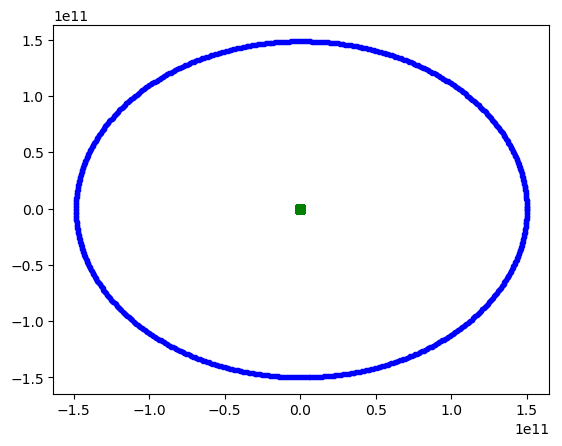

PyObject <matplotlib.collections.PathCollection object at 0x12b7b0450>

In [2]:

# Plot both orbits
scatter(C1[1:nintv,1],C1[1:nintv,2],marker=".",color="blue")
scatter(C2[1:nintv,1],C2[1:nintv,2],marker=",",color="green")




   ### Gravació del plot

In [ ]:
savefig("orbit.png")
